### Place all imports here

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
np.random.seed(42)

In [ ]:
# coding scheme 0
# NULL hypothesis: no chunking
# Note: defining chunkability = 1 - (code length)/(sequence length), which for no chunking is 0
def hyp0(seq): 
    code = seq
    code_len = len(seq)
    chunkability = 0
    return code_len, chunkability, code 

In [ ]:
# Repeat chunking for hypotheses 1 (single repeats only) and 3 (+ multicolor and nested repeats).
def find_repeats(seq, length): 
    """
    Finds repeats of patterns of a fixed length.
    """
    i = 0
    result = []
    while i < len(seq):
        if i + 2 * length <= len(seq) and seq[i:i+length] == seq[i+length:i+2*length]:
            pattern = seq[i:i+length]
            count = 2
            j = i + 2 * length
            while j + length <= len(seq) and seq[j:j+length] == pattern:
                count += 1
                j += length
            result.append(f'[{pattern}]{count}')
            i = j

        else: # move onto the next character
            result.append(seq[i])
            i += 1

    return ''.join(result)

def repeat_chunking(seq, single_only=False): 
    '''
    Finds repeating patterns within a sequence recursively.
    If single_only, only simple single-character repeats.
    Otherwise, includes multicolor and nested repeats.
    Note: Shorter pattern lengths are chunked first. Once a character is chunked, that chunk cannot be broken.
        E.g. GBGBBB = GBG[B]3, not [GB]2[B]2 because the B's at the end are chunked first.
    '''
    length = 1 # Initialize pattern length
    max_len = 1

    # recursively look for repeating patterns of increasing length
    new_seq = seq
    while length <= max_len:
        new_seq = find_repeats(new_seq, length)
        max_len = 1 if single_only else len(new_seq)//2
        length += 1 # increase length and keep going

    code = ''.join(new_seq)
    code_len = len(code.replace('[', '').replace(']', ''))
    chunkability = 1 - code_len/len(seq)

    return code_len, chunkability, code

In [ ]:
# coding scheme 1: chunking simple (single character) repeats only.
def hyp1(seq):
    return repeat_chunking(seq, single_only=True)

# Testing hyp1 code
test_sequences = ['BBBRRRYYYGGG', 'RRRZGZRRR', 'BBBBGRY', 'RRRYGYGYG', 'GBGBB', 
                    'BBBBBBBrrrBBBBBB', 'GGGGGGGG', 'ABCD', 'BGGGR', 'abbabbabba']
answers = [8, 7, 5, 8, 5, 6, 2, 4, 4, 10]

for i in range(len(test_sequences)):
    s_idx = i
    sequence = test_sequences[s_idx]
    print(sequence, answers[s_idx])
    print(hyp1(sequence))
    if hyp1(sequence)[0] != answers[s_idx]:
        print('^ERROR')

BBBRRRYYYGGG 8
(8, 0.33333333333333337, '[B]3[R]3[Y]3[G]3')
RRRZGZRRR 7
(7, 0.2222222222222222, '[R]3ZGZ[R]3')
BBBBGRY 5
(5, 0.2857142857142857, '[B]4GRY')
RRRYGYGYG 8
(8, 0.11111111111111116, '[R]3YGYGYG')
GBGBB 5
(5, 0.0, 'GBG[B]2')
BBBBBBBrrrBBBBBB 6
(6, 0.625, '[B]7[r]3[B]6')
GGGGGGGG 2
(2, 0.75, '[G]8')
ABCD 4
(4, 0.0, 'ABCD')
BGGGR 4
(4, 0.19999999999999996, 'B[G]3R')
abbabbabba 10
(10, 0.0, 'a[b]2a[b]2a[b]2a')


In [ ]:
# coding scheme 3: including complex repeats.
def hyp3(seq):
    return repeat_chunking(seq, single_only=False)

# Testing hyp3 code
test_sequences = ['BBBRRRYYYGGG', 'RRRZGZRRR', 'BBBBGRY', 'RRRYGYGYG', 'GBGBB', 
                'BBBBBBBrrrBBBBBB', 'GRGRGRZDZDZDZTTTTTTTGGG', 'ababcdcdababcdcd',
                'abbabbabba', 'abcabcabc', 'abbccccabbccccabbcccc', 'bbbbaaaabbbbaaaa',
                'bbbaaabbbaaa', 'bbaabbaa', 'baba', 'bbaabbaab']
answers = [8, 7, 5, 5, 5, 6, 11, 7, 5, 4, 6, 5, 5, 5, 3, 6] # with nesting

for i in range(len(test_sequences)):
    s_idx = i
    sequence = test_sequences[s_idx]
    print(sequence, answers[s_idx])
    print(hyp3(sequence))
    if hyp3(sequence)[0] != answers[s_idx]:
        print('^ERROR')

BBBRRRYYYGGG 8
(8, 0.33333333333333337, '[B]3[R]3[Y]3[G]3')
RRRZGZRRR 7
(7, 0.2222222222222222, '[R]3ZGZ[R]3')
BBBBGRY 5
(5, 0.2857142857142857, '[B]4GRY')
RRRYGYGYG 5
(5, 0.4444444444444444, '[R]3[YG]3')
GBGBB 5
(5, 0.0, 'GBG[B]2')
BBBBBBBrrrBBBBBB 6
(6, 0.625, '[B]7[r]3[B]6')
GRGRGRZDZDZDZTTTTTTTGGG 11
(11, 0.5217391304347826, '[GR]3[ZD]3Z[T]7[G]3')
ababcdcdababcdcd 7
(7, 0.5625, '[[ab]2[cd]2]2')
abbabbabba 5
(5, 0.5, '[a[b]2]3a')
abcabcabc 4
(4, 0.5555555555555556, '[abc]3')
abbccccabbccccabbcccc 6
(6, 0.7142857142857143, '[a[b]2[c]4]3')
bbbbaaaabbbbaaaa 5
(5, 0.6875, '[[b]4[a]4]2')
bbbaaabbbaaa 5
(5, 0.5833333333333333, '[[b]3[a]3]2')
bbaabbaa 5
(5, 0.375, '[[b]2[a]2]2')
baba 3
(3, 0.25, '[ba]2')
bbaabbaab 6
(6, 0.33333333333333337, '[[b]2[a]2]2b')


In [ ]:
# Correct implementation of Lempel-Ziv complexity
def lempel_ziv_complexity(sequence, return_patterns=False):
    """
    Calculates the Lempel-Ziv complexity of a given sequence using a linear time algorithm as described on Wikipedia.
    Optionally returns the set of unique patterns found in the sequence.

    Args:
        sequence (str): The input sequence, which can be of any finite-sized alphabet.
        return_patterns (bool): If True, function also returns the set of unique patterns found.

    Returns:
        int: The Lempel-Ziv complexity of the sequence.
        set (optional): Set of unique patterns found in the sequence.
    """
    n = len(sequence)  # Total length of the sequence
    i = 0  # Current position in the sequence for comparison
    C = 1  # Initialize complexity count. At least one unique subpattern exists.
    u = 1  # Position marking the start of the new component
    v = 1  # Length of the current component being examined
    vmax = v  # Maximum length of a component found at the current position
    unique_patterns = set()  # Set to store unique patterns

    # Loop until the end of the sequence is reached with the current component
    while u + v <= n:
        # If we are not at the end and characters at positions match, extend the component
        if (i + v < n) and (u + v < n) and (sequence[i + v] == sequence[u + v]):
            v += 1
        else:
            # No match found or end reached, update the maximum component length found so far
            vmax = max(v, vmax)
            # Move the comparison index forward
            i += 1
            # Check if we've tried all starting positions up to u
            if i == u:
                # All starting positions have been tried, increment complexity
                C += 1
                new_pattern = sequence[u : u + vmax]
                unique_patterns.add(new_pattern)
                # Move to next position by the length of the longest component found
                u += vmax
                # Reset component length and starting index
                v = 1
                i = 0
                vmax = v
            else:
                # Reset component length to 1 to try a new starting position
                v = 1

    # After exiting the loop, if a component was being built, it's considered a unique pattern
    if v != 1:
        C += 1
        new_pattern = sequence[u : u + v - 1]
        unique_patterns.add(new_pattern)

    if return_patterns:
        return C, unique_patterns
    else:
        return C

In [ ]:
lempel_ziv_complexity('AACACBACBDACBDAACBDACACBDACACB', True)

(7, {'A', 'ACBDAC', 'ACBDACACB', 'BACB', 'CAC', 'DACBDA'})

In [ ]:
# coding scheme 2
def hyp2(seq):
    """Calculate the Lempel-Ziv complexity of a sequence with a limited set of characters."""
    # Call `lempel_ziv_complexity` helper function on the sequence `seq`
    code_len, patterns = lempel_ziv_complexity(seq, return_patterns=True)
    chunkability = 1 - code_len/len(seq)
    return code_len, chunkability, patterns

# Example usage
input_seq = "jkkrbrbjkkjkkjkkmmb"
output_string = hyp2(input_seq)
print(output_string)  # Expected output should be "jk2rb2jk23m2b"

# Example usage
input_seq = "abcdabcdaaabbaaabbcccddddddmmmmmaaamamama"
output_string = hyp2(input_seq)
print(output_string)  # Expected to be "abcd2a3b2a3b2"

(8, 0.5789473684210527, {'mm', 'b', 'kk', 'jkkjkk', 'r', 'brb', 'jkk'})
(12, 0.7073170731707317, {'mmmmm', 'dddddd', 'baaabb', 'b', 'd', 'aab', 'aaa', 'c', 'ccc', 'abcda', 'mamama'})


### Given hypotheses, finding sequences that most efficiently differentiate between hypotheses

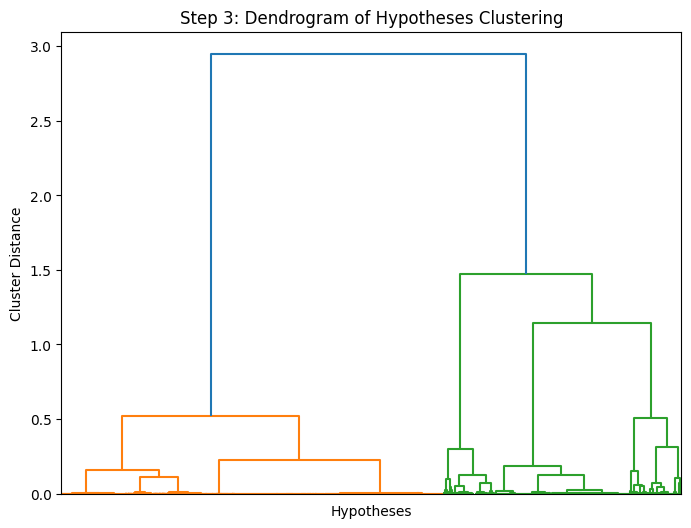


Selected sequences based on clustering: ['RRBBYBGRGRYRBYRYYYGB' 'BBRYGYYGBYBGYGRBYRYB' 'BGYRRGBGRYGYBBYBYYYB'
 'YBRBRBRYBYRYRYBRYRRR' 'GGYYRRRBYRRYRRGYGYRB' 'RGRBGBYBBBBRGRRRBRGR'
 'RYGRBBYGYYYYBGYGBBRR' 'RRRBRGYBBRYYYGYRGYRG' 'RBYGRBBBYYYRBRRRYBGY'
 'RBBBBYRRBGGGGYRRRGBG']


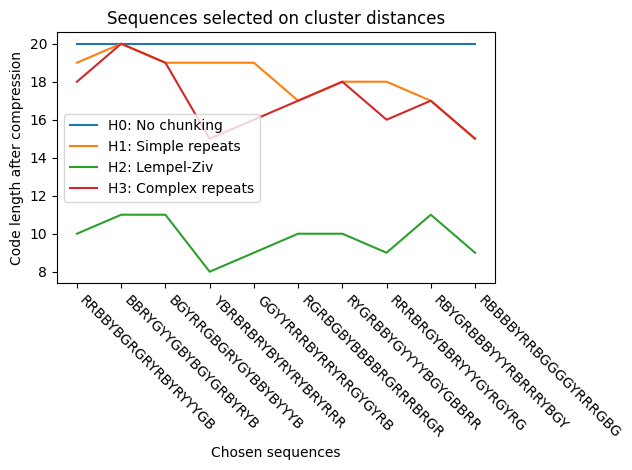

In [ ]:
# Hokyung experimental clustering code for finding sequences that disambiguate between hypotheses

# Using hierarchical clustering to identify sequences that are minimally correlated with each other across different 
# hypotheses' ratings. By finding such sequences, you can potentially maximize the variance in responses during the 
# memory test, thus providing a robust test of the hypotheses. Hierarchical clustering groups sequences based on the 
# similarity of their ratings across different hypotheses. By using a 'correlation' metric for distances, the goal is 
# to minimize overlap in the feature space defined by the hypotheses' ratings, which helps in selecting diverse sequences.

# Constants
num_sequences = 10000  # Total sequences
sequence_length = 20   # Length of each sequence
num_select = 10        # Sequences to select
letters = ["R", "B", "G", "Y"]  # Available letters

# Hypotheses list
hypotheses = [hyp0, hyp1, hyp2, hyp3]

# Step 1: Generate sequences of letters
sequences = np.random.choice(letters, (num_sequences, sequence_length))
sequences_str = ["".join(seq) for seq in sequences]

# Step 2: Generate ratings using hypothesis functions
ratings = np.array([[hyp("".join(seq))[0] for hyp in hypotheses] for seq in sequences])

# Step 3: Generate condensed distance matrix using pdist
# X is an m by n array of m original observations in an n-dimensional space.
# Setting metric='correlation' uses 1 - correlation coefficient.
condensed_dist_matrix_pdist = pdist(X=ratings, metric="correlation")

# Step 4: Apply hierarchical clustering directly using the condensed distance matrix
Z = linkage(condensed_dist_matrix_pdist, method="ward")

# Dendrogram to visualize the clustering
plt.figure(figsize=(8, 6))
dendrogram(Z, no_labels=True)  # No labels to avoid clutter
plt.title("Step 3: Dendrogram of Hypotheses Clustering")
plt.xlabel("Hypotheses")
plt.ylabel("Cluster Distance")
plt.show()

# Step 5: Determine cluster assignments for each hypothesis
cluster_labels = fcluster(Z, t=num_select, criterion='maxclust')

# Select one sequence that represents each cluster
selected_indices = []
selected_sequences = []
unique_clusters = np.unique(cluster_labels)
for label in unique_clusters:
    indices_in_cluster = np.where(cluster_labels == label)[0]
    assert len(indices_in_cluster) > 0, "Got a cluster with no sequences?!"
    # Choose a random sequence as representative for this cluster
    index = np.random.choice(indices_in_cluster)
    selected_indices.append(index)  
    selected_sequences.append(sequences_str[index])
chosen_indices = selected_indices[:num_select]
chosen_sequences = selected_sequences[:num_select]

# Inspect the selected sequences
print(f"\nSelected sequences based on clustering: {np.array(chosen_sequences)}")

# Plotting the lines for each hypothesis
chosen_ratings = ratings[chosen_indices]
plt.plot(chosen_ratings[:, 0], label="H0: No chunking")
plt.plot(chosen_ratings[:, 1], label="H1: Simple repeats")
plt.plot(chosen_ratings[:, 2], label="H2: Lempel-Ziv")
plt.plot(chosen_ratings[:, 3], label="H3: Complex repeats")

# Set the labels for the x-axis to be the chosen sequences, rotated at -45 degrees.
plt.xticks(ticks=np.arange(len(chosen_sequences)), labels=chosen_sequences, rotation=-45, ha="left")
plt.ylabel("Code length after compression")
plt.xlabel('Chosen sequences')
plt.title("Sequences selected on cluster distances")
plt.legend()
plt.tight_layout()

# Save the plot to a file
plt.savefig("clustered_sequences.png")
plt.show()

Do the matrices match? True


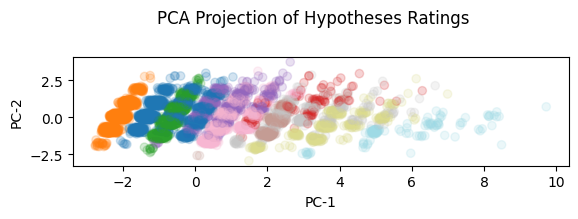

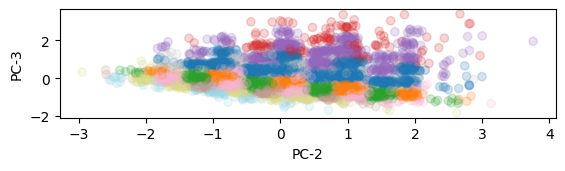

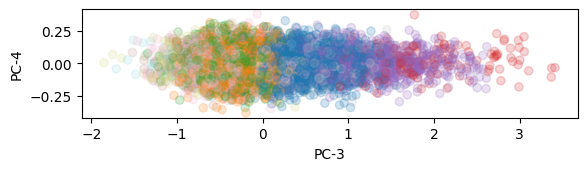


Loadings for principal component 1:
	Hypothesis 0 has a weight of -0.000 in principal component 1.
	Hypothesis 1 has a weight of -0.608 in principal component 1.
	Hypothesis 2 has a weight of -0.258 in principal component 1.
	Hypothesis 3 has a weight of -0.751 in principal component 1.

Loadings for principal component 2:
	Hypothesis 0 has a weight of -0.001 in principal component 2.
	Hypothesis 1 has a weight of 0.396 in principal component 2.
	Hypothesis 2 has a weight of -0.918 in principal component 2.
	Hypothesis 3 has a weight of -0.005 in principal component 2.

Loadings for principal component 3:
	Hypothesis 0 has a weight of -0.002 in principal component 3.
	Hypothesis 1 has a weight of 0.688 in principal component 3.
	Hypothesis 2 has a weight of 0.301 in principal component 3.
	Hypothesis 3 has a weight of -0.661 in principal component 3.

Loadings for principal component 4:
	Hypothesis 0 has a weight of 1.000 in principal component 4.
	Hypothesis 1 has a weight of 0.002 i

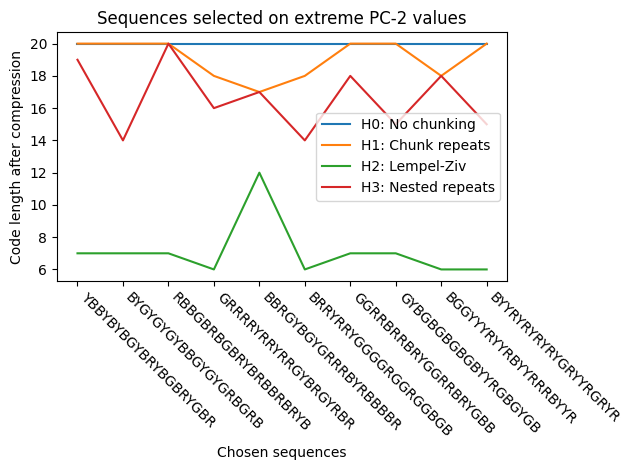

In [ ]:
# Quilee experimental PCA code for finding sequences that disambiguate between hypotheses

# PCA (Principal Component Analysis) is a dimensionality reduction technique that finds the axes 
# (principal components) that maximize variance in the data. When applied to your hypotheses ratings, 
# the first principal component would capture the direction of greatest variance among the sequences, 
# and subsequent components would capture the most variance possible orthogonal to the previous components.
# We might use PCA to:
# 1. Identify the principal components of the hypotheses' ratings.
# 2. Select sequences that have extreme values along the first few principal components.
# These sequences would likely represent extremes in the feature space and might help to 
# differentiate between the hypotheses.
# 1. Run PCA on the ratings.
# 2. Look at the scores of the sequences on the first few principal components.
# 3. Select sequences that are outliers or have extreme scores.
# These sequences might be the most informative in terms of differentiating how each hypothesis rates 
# the difficulty of the sequences.

### >>> DEBUG: Some experimental/pedagogical vizualization >>> ###
# Calculate the correlation matrix of ratings under each hypothesis.
# Each row of x represents a variable, and each column a single observation of all those variables.
# We want to get the full correlation coefficient matrix of sequences (i.e. for every sequence pair).
correlation_matrix = np.corrcoef(x=ratings)  

# Convert the correlation matrix to a distance matrix
corr_distance_matrix = np.round(1-correlation_matrix, 8)

# Get the upper triangular part of the correlation distance matrix
condensed_dist_matrix_manual = squareform(corr_distance_matrix)

# Compare the two condensed distance matrices
comparison = np.allclose(condensed_dist_matrix_pdist, condensed_dist_matrix_manual)
print(f"Do the matrices match? {comparison}")

# Visualize the distribution of ratings using PCA for dimensionality reduction
# Add a small amount of noise to perturb hypotheses that return a constant rating.
n_components = len(hypotheses)
pca = PCA(n_components) 
ratings_pca = pca.fit_transform(ratings + 0.1*np.random.randn(*ratings.shape)) 

# Plot the projections along the first 2 principal components
plt.figure()
plt.suptitle("PCA Projection of Hypotheses Ratings")
plt.subplot(3,1,1)
plt.scatter(ratings_pca[:, 0], ratings_pca[:, 1], alpha=0.2, c=cluster_labels, cmap='tab20')
plt.xlabel("PC-1")
plt.ylabel("PC-2")
plt.show()

# Plot the projections along the second 2 principal components
plt.subplot(3,1,2)
plt.scatter(ratings_pca[:, 1], ratings_pca[:, 2], alpha=0.2, c=cluster_labels, cmap='tab20')
plt.xlabel("PC-2")
plt.ylabel("PC-3")
plt.show()

# Plot the projections along the last 2 principal components
plt.subplot(3,1,3)
plt.scatter(ratings_pca[:, 2], ratings_pca[:, 3], alpha=0.2, c=cluster_labels, cmap='tab20')
plt.xlabel("PC-3")
plt.ylabel("PC-4")
plt.show()

# The loadings of the each principal component.
# The pattern of loadings will tell you about the nature of the variance captured by PC-1, for example. 
# If the loadings are all of the same sign (all positive or all negative), PC-1 might be capturing a general trend across all hypotheses. 
# If the loadings have mixed signs, PC-1 might be distinguishing between hypotheses that score sequences oppositely.
loadings_variance = []
for i in range(n_components):
    pci_loadings = pca.components_[i]
    loadings_variance.append(np.var(pci_loadings))
    # Print out the loadings
    print(f"\nLoadings for principal component {i+1}:")
    for j, loading in enumerate(pci_loadings):
        print(f"\tHypothesis {j} has a weight of {loading:.3f} in principal component {i+1}.")

# We select a PC that has a loadings pattern with different magnitudes and signs across the 4 hypotheses.
pc_idx = 1
print(f"\nChosen principal component: PC-{pc_idx+1}")

# Find the sequences with the most extreme values on the selected principal component
extreme_indices = np.argsort(np.abs(ratings_pca[:, pc_idx]))[-num_select:]

# Select these sequences
extreme_sequences = [sequences_str[idx] for idx in extreme_indices]

# Inspect the selected sequences
print(f"\nSelected sequences based on PC-{pc_idx+1} extremes: {np.array(extreme_sequences)}")

# Plotting the lines for each hypothesis
extreme_ratings = ratings[extreme_indices]
plt.plot(extreme_ratings[:, 0], label="H0: No chunking")
plt.plot(extreme_ratings[:, 1], label="H1: Chunk repeats")
plt.plot(extreme_ratings[:, 2], label="H2: Lempel-Ziv")
plt.plot(extreme_ratings[:, 3], label="H3: Nested repeats")

# Set the labels for the x-axis to be the chosen sequences, rotated at -45 degrees.
plt.xticks(ticks=np.arange(len(extreme_sequences)), labels=extreme_sequences, rotation=-45, ha="left")
plt.ylabel("Code length after compression")
plt.xlabel("Chosen sequences")
plt.title(f"Sequences selected on extreme PC-{pc_idx+1} values")
plt.legend()
plt.tight_layout()

# Save the plot to a file
plt.savefig("extreme_pca_sequences.png")
plt.show()

# This approach selects the sequences that are furthest along the first principal component, 
# which could be interpreted as the sequences most differently rated by the hypotheses. 
# However, this approach assumes that the first principal component captures the most meaningful 
# variance for differentiating hypotheses, which may not always be true. 
# It is also important to note that PCA does not necessarily select sequences that are minimally correlated; 
# rather, it identifies the directions of greatest variance, which is related but not identical to correlation.
# ### <<< DEBUG: Some experimental/pedagogical vizualization <<< ###

In [ ]:

# #############################

# ### HOKYUNG ORIGINAL CODE - no changes ###

# # Constants
# num_sequences = 10000  # Total sequences
# sequence_length = 20   # Length of each sequence
# num_select = 10        # Sequences to select
# clusters_needed = 20   # Number of clusters to form
# letters = ['r', 'b', 'g', 'y']  # Available letters

# # Hypotheses list
# hypotheses = [hyp0, hyp1, hyp2, hyp3, hyp4]

# # Step 1: Generate sequences of letters
# np.random.seed(42)
# sequences = np.random.choice(letters, (num_sequences, sequence_length))
# sequences_str = [''.join(seq) for seq in sequences]

# # Step 2: Generate ratings using hypothesis functions
# ratings = np.array([[hyp(''.join(seq))[0] for hyp in hypotheses] for seq in sequences])

# # Step 3: Generate condensed distance matrix using pdist
# condensed_distance_matrix = pdist(ratings, 'correlation')

# # Step 4: Apply hierarchical clustering directly using the condensed distance matrix
# Z = linkage(condensed_distance_matrix, method='average')

# # Step 5: Determine cluster assignments
# cluster_labels = fcluster(Z, clusters_needed, criterion='maxclust')

# # Identify one sequence from each cluster (if possible)
# selected_sequences = []
# selected_indices = []
# for cluster in range(1, clusters_needed + 1):
#     # Find sequences in this cluster
#     sequences_in_cluster = np.where(cluster_labels == cluster)[0]
#     if len(sequences_in_cluster) > 0:
#         # Randomly select one sequence from this cluster
#         index = np.random.choice(sequences_in_cluster)
#         selected_indices.append(index)
#         selected_sequences.append(sequences_str[index])

# chosen_indices = selected_indices[:num_select]
# chosen_seqs = selected_sequences[:num_select]  # Ensure we only have 20
# print(np.array([[hyp(''.join(seq))[0] for hyp in hypotheses] for seq in chosen_seqs]))

# #############################


### Out of 1000 simulated length-20 sequences, we want a set of 10 sequences which maximizes the within-hypothesis ratings variance, while minimizing the across-hypothesis ratings covariance.

To address your objective, you'll need an approach that balances two criteria:

1. Maximizing within-hypothesis variance: Select sequences that, for each hypothesis, have a wide range of ratings. This implies looking for sequences that are rated very differently by the same hypothesis.

2. Minimizing across-hypothesis covariance: Choose sequences such that if one hypothesis rates a sequence as easy/hard, this doesn't predict whether another hypothesis will rate it as easy/hard. In other words, the way one hypothesis rates the sequences should not inform us about how another rates them.

The hierarchical clustering method your collaborator used was trying to find sequences that are minimally correlated across hypotheses. This aligns with minimizing across-hypothesis covariance, but it doesn't explicitly maximize within-hypothesis variance.

For your task, PCA could help with the first criterion because it seeks axes of maximum variance. However, PCA alone doesn't consider covariance across hypotheses in the way you're looking for. A combination of PCA to find a variance-maximizing set of sequences and then filtering or adjusting this set to minimize across-hypothesis covariance would be needed.

Here's a conceptual approach that could achieve both criteria:
- Use PCA to find axes of maximum variance in the ratings data.
- Select sequences with extreme values (either high or low) along the first few principal components to maximize within-hypothesis variance.
- Among these, choose sequences that are uncorrelated or less correlated across different hypotheses to minimize across-hypothesis covariance. This could involve additional statistical analysis or optimization techniques like quadratic programming.

Here is an outline for a revised code snippet to include both steps:

```python
import numpy as np
from sklearn.decomposition import PCA
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, fcluster

# ... [Previous steps: generating sequences and computing ratings] ...

# Apply PCA to the ratings to maximize within-hypothesis variance
pca = PCA()
ratings_pca = pca.fit_transform(ratings)

# Select sequences with extreme values on the first few principal components
# This selection can be refined to ensure a spread across the full range of each component
extreme_indices = np.argpartition(np.abs(ratings_pca[:, :2]), [-num_select, -2*num_select], axis=0).flatten()
unique_extreme_indices = np.unique(extreme_indices)

# Compute pairwise correlations of selected sequences to minimize across-hypothesis covariance
selected_ratings = ratings[unique_extreme_indices, :]
correlation_matrix = np.corrcoef(selected_ratings.T)
upper_tri_corr = squareform(correlation_matrix)

# Optimize to find a subset of 'num_select' sequences with the lowest average correlation
# ... [Optimization code or algorithm to minimize the average of 'upper_tri_corr'] ...

# After optimization, suppose 'final_indices' contains the indices of the sequences we've chosen
final_indices = ... # placeholder for indices after optimization
chosen_sequences = sequences_str[final_indices]

# ... [Plotting and other output code] ...
```

Please note that the optimization step is non-trivial and requires further work. You may need to employ an optimization library or develop a custom function that selects a subset of sequences that minimizes the sum of their pairwise correlations, subject to the constraint that they must come from the set of sequences with extreme PCA scores.

It's also important to highlight that, depending on the specifics of the hypotheses and the data, there might not be a set of sequences that perfectly meets both criteria, and a trade-off might be necessary.

In [ ]:
# Null hypotheses: length vs 1 - code_length/length

def generate_random_sequence(max_seq_len=100):
    sequence = "".join(
        np.random.choice(["B", "G", "R", "Y"], size=np.random.randint(1, max_seq_len))
    )
    return sequence


# Generate sequences and compute chunkabilities
n = 10000
max_seq_len = 30
sequences, lengths, chunk1, chunk2, chunk3 = [], [], [], [], []
codelen1, codelen2, codelen3 = [], [], []

for _ in range(n):
    sequence = generate_random_sequence(max_seq_len=max_seq_len)
    sequences.append(sequence)
    lengths.append(len(sequence))
    
    chunk1.append(hyp1(sequence)[1])
    chunk2.append(hyp2(sequence)[1])
    chunk3.append(hyp3(sequence)[1])

    codelen1.append(hyp1(sequence)[0])
    codelen2.append(hyp2(sequence)[0])
    codelen3.append(hyp3(sequence)[0])

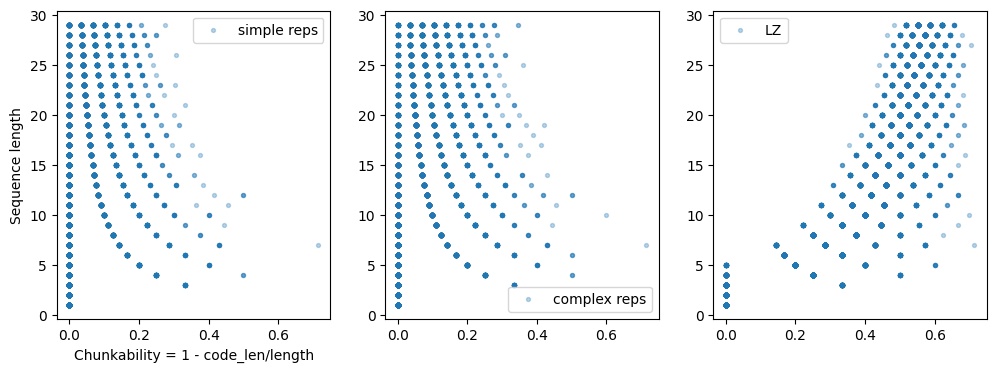

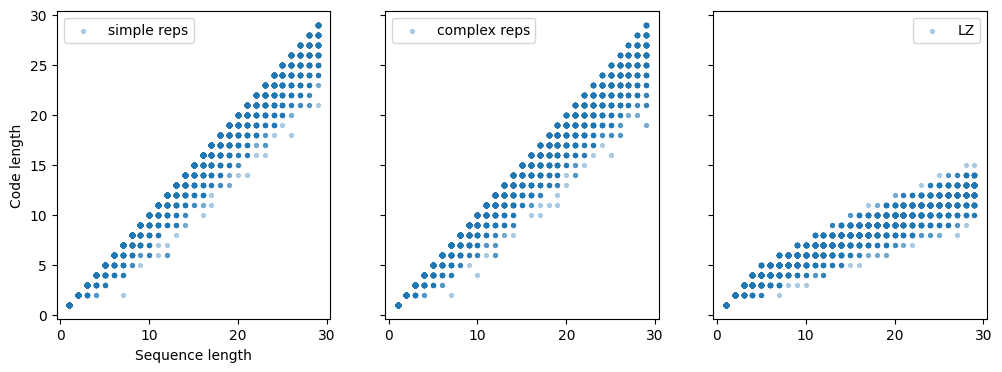

In [ ]:
# Plot simulation null hyp

# length vs. chunkability
f, ax = plt.subplots(1, 3, figsize=(12,4))
s = 8
a = 0.3
ax[0].scatter(chunk1, lengths, alpha=a, s=s, label='simple reps')
ax[1].scatter(chunk3, lengths, alpha=a, s=s, label='complex reps')
ax[2].scatter(chunk2, lengths, alpha=a, s=s, label='LZ')
ax[0].set_xlabel('Chunkability = 1 - code_len/length')
ax[0].set_ylabel('Sequence length')
for i in range(3):
    ax[i].legend()

# code length vs length
f, ax = plt.subplots(1, 3, figsize=(12,4), sharey=True)
ax[0].scatter(lengths, codelen1, alpha=a, s=s, label='simple reps')
ax[1].scatter(lengths, codelen3, alpha=a, s=s, label='complex reps')
ax[2].scatter(lengths, codelen2, alpha=a, s=s, label='LZ')
ax[0].set_ylabel('Code length')
ax[0].set_xlabel('Sequence length')
for i in range(3):
    ax[i].legend()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=3569eb68-a6a6-4122-9c3d-498e88f49235' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>